In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP100
n=100

#Fitxer que contè en CV els gens més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensCV_noversio_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000160882,ENSG00000259384,ENSG00000172023,ENSG00000280800,ENSG00000172179,ENSG00000210117,ENSG00000169248,ENSG00000159723,ENSG00000210154,...,ENSG00000145708,ENSG00000211644,ENSG00000134321,ENSG00000260027,ENSG00000102287,ENSG00000205856,ENSG00000117228,ENSG00000275874,ENSG00000277632,ENSG00000128610
0,Brain - Cortex,0.35630,0.0000,0.00000,0.00000,0.00000,0.4912,0.03501,0.30600,6.876,...,7.4750,3.005,4.5130,0.04372,1.623,0.13280,2.067,0.00000,0.7542,0.11680
1,Brain - Cerebellum,0.43660,0.2089,0.73670,0.05680,0.00000,0.7710,0.21980,0.48040,3.084,...,0.3341,4.313,0.6145,0.48040,3.261,0.00000,2.825,0.07153,0.5074,0.18340
2,Brain - Cortex,0.18460,4.2000,1.93800,0.00000,8.21200,6.0850,0.68150,0.11610,16.520,...,2.5310,1.444,1.8430,0.03868,1.087,0.03917,1.835,0.08064,0.1907,0.14770
3,Brain - Cerebellum,0.09784,15.7600,0.12580,0.05819,9.01800,7.1090,0.45040,0.28120,12.640,...,0.2781,2.209,0.5820,0.00000,1.561,0.00000,1.517,0.00000,0.3465,0.00000
4,Brain - Cortex,0.01387,6.9020,0.06242,0.02888,11.84000,1.9600,0.11180,0.34890,5.095,...,5.5510,3.152,2.9000,0.06977,1.150,0.10600,2.627,0.00000,15.5600,0.06660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,0.34510,0.0000,1.62900,0.00000,0.00000,3.3300,28.63000,0.50800,4.757,...,5.3460,1.497,1.7670,0.00000,3.436,0.02143,16.150,0.00000,0.8347,0.11310
2637,Brain - Cerebellum,0.39970,0.7800,1.74600,0.14680,0.00000,7.9730,0.00000,0.65050,7.973,...,0.3239,2.671,0.8093,0.00000,1.405,0.05988,1.882,0.06164,0.2915,0.31610
2638,Brain - Cortex,0.22160,8.2930,1.51900,0.00000,11.39000,2.9820,0.08501,0.58380,9.541,...,0.9205,11.680,2.8340,0.00000,20.760,0.00000,6.320,0.05532,6.2790,0.04053
2639,Brain - Cerebellum,0.00000,1.8660,0.00000,0.58550,0.55470,2.3840,0.00000,0.42440,9.537,...,0.1291,1.667,0.5259,0.00000,5.619,0.07163,2.663,0.07373,0.6974,0.05402


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

52 components expliquen un 95% de la variança. De 100 dimensions a 52


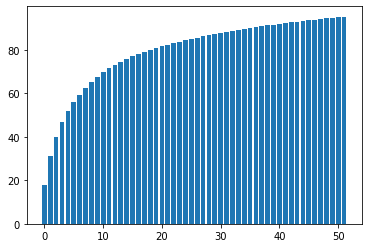

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-1.704875,6.347339,-3.592804,-4.821273,3.359582,-3.761648,-0.664959,0.681385,1.283827,-2.093905,...,0.286773,0.768875,0.410544,0.187442,-0.469899,-1.092212,0.019850,1.009807,0.585310,-0.563338
1,-2.489581,4.121104,-2.925664,1.257606,-3.248192,-1.394969,-0.678771,-0.716686,-1.395325,-1.318380,...,0.385630,-0.680813,-0.463764,-0.430867,0.188832,-0.372462,-0.351847,-0.270194,0.516297,0.250026
2,-0.418572,-1.775624,6.415938,-2.515511,4.236313,3.217939,-0.386299,-3.067222,1.335127,1.118118,...,1.052316,-0.129333,-0.542919,-0.995759,-0.160995,-0.837852,0.130905,-0.864093,-1.633133,-0.764521
3,-2.515035,-6.418221,-3.654486,-2.083772,-2.246833,0.141481,-0.550250,-1.385317,0.183990,-0.067649,...,-0.179782,-0.177838,0.031430,-0.069891,0.031512,0.148419,-0.188026,0.068173,0.007113,0.090251
4,-3.619235,-5.064460,-2.726108,-4.660412,-0.373087,-0.998438,-1.701495,-1.370622,1.240303,-0.402333,...,0.928950,0.868812,-0.725432,-0.658973,0.301994,-0.875683,0.142586,0.681978,0.906796,-0.573355


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,SMTSD
0,-1.704875,6.347339,-3.592804,-4.821273,3.359582,-3.761648,-0.664959,0.681385,1.283827,-2.093905,...,0.768875,0.410544,0.187442,-0.469899,-1.092212,0.019850,1.009807,0.585310,-0.563338,Brain - Hippocampus
1,-2.489581,4.121104,-2.925664,1.257606,-3.248192,-1.394969,-0.678771,-0.716686,-1.395325,-1.318380,...,-0.680813,-0.463764,-0.430867,0.188832,-0.372462,-0.351847,-0.270194,0.516297,0.250026,Brain - Cerebellum
2,-0.418572,-1.775624,6.415938,-2.515511,4.236313,3.217939,-0.386299,-3.067222,1.335127,1.118118,...,-0.129333,-0.542919,-0.995759,-0.160995,-0.837852,0.130905,-0.864093,-1.633133,-0.764521,Brain - Frontal Cortex (BA9)
3,-2.515035,-6.418221,-3.654486,-2.083772,-2.246833,0.141481,-0.550250,-1.385317,0.183990,-0.067649,...,-0.177838,0.031430,-0.069891,0.031512,0.148419,-0.188026,0.068173,0.007113,0.090251,Brain - Nucleus accumbens (basal ganglia)
4,-3.619235,-5.064460,-2.726108,-4.660412,-0.373087,-0.998438,-1.701495,-1.370622,1.240303,-0.402333,...,0.868812,-0.725432,-0.658973,0.301994,-0.875683,0.142586,0.681978,0.906796,-0.573355,Brain - Frontal Cortex (BA9)


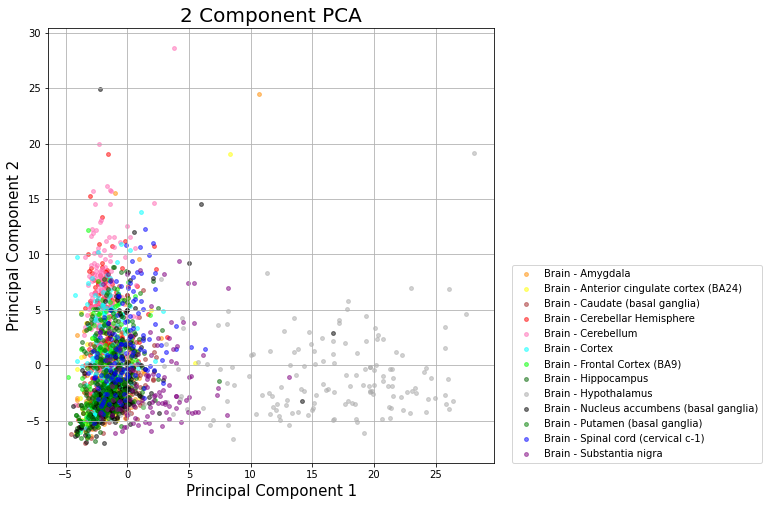

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

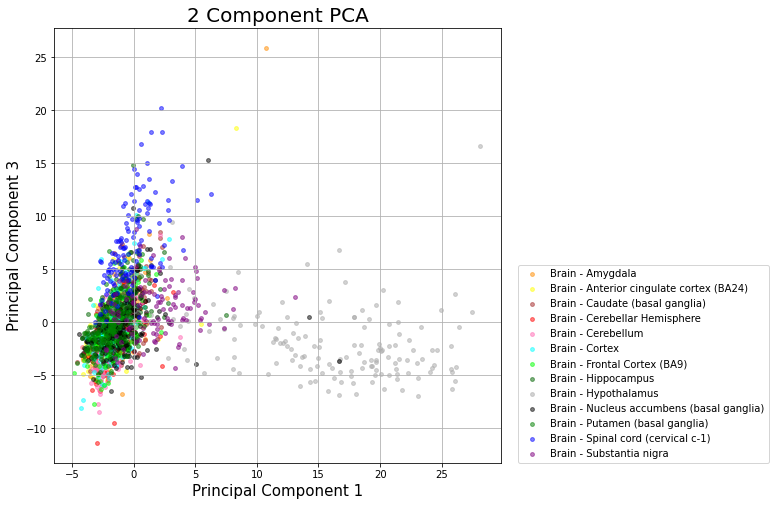

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.001s...
[t-SNE] Computed neighbors for 2112 samples in 0.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 2.919916
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.943863
[t-SNE] KL divergence after 1000 iterations: 1.530948


,X,Y,Tipus Teixit
0,33.317039,9.140338,Brain - Hippocampus
1,53.972805,-4.045377,Brain - Cerebellum
2,-10.605828,13.642507,Brain - Frontal Cortex (BA9)
3,-26.178249,-1.710931,Brain - Nucleus accumbens (basal ganglia)
4,-33.214390,2.375109,Brain - Frontal Cortex (BA9)


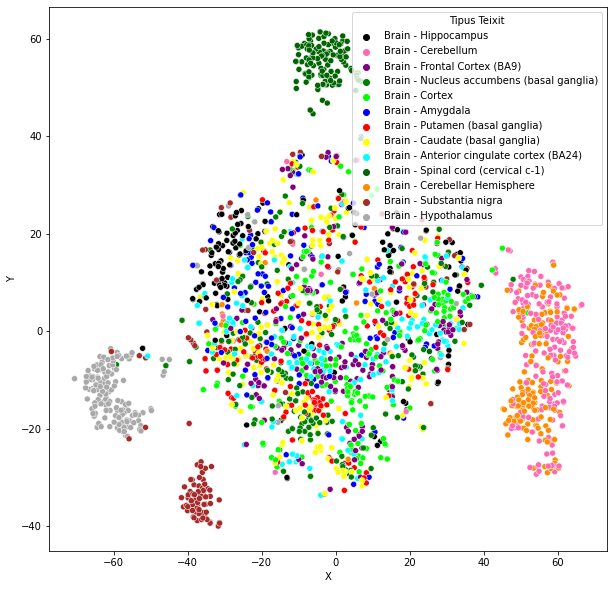

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
39 # Prec. mitjana:  54.02351783957793  desv.:  2.372908991868316  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
38 # Prec. mitjana:  54.16592148797281  desv.:  2.4079816721495133  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
40 # Prec. mitjana:  53.882008405615665  desv.:  2.264255135786298  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
37 # Prec. mitjana:  54.356836269337386  desv.:  2.692364137215547  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
33 # Prec. mitjana:  54.73419475990342  desv.:  2.0772670679070124  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
35 # Prec. mitjana:  54.59357954037378  desv.:  2.2390015614623766  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
34 # Prec. mitjana:  54.732406331038185  desv.:  2.677965915840536  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
36 # Prec. mitjana:  54.54484485379594  desv.:  2.7611916922692186  paràmetres:  

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,12,2,2,0,0,3,2,6,0,1,6,0,0
Brain - Anterior cingulate cortex (BA24),1,9,0,0,0,6,9,1,0,1,1,0,0
Brain - Caudate (basal ganglia),0,0,28,0,0,1,1,2,0,13,7,0,0
Brain - Cerebellar Hemisphere,0,0,2,39,8,0,0,0,0,1,1,0,0
Brain - Cerebellum,0,0,0,14,38,3,0,0,0,0,0,0,0
Brain - Cortex,0,3,0,0,0,30,6,0,0,1,2,0,0
Brain - Frontal Cortex (BA9),0,0,2,0,0,13,14,0,0,0,4,0,0
Brain - Hippocampus,2,3,1,0,1,2,2,28,0,0,2,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,2,34,2,0,0,0


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.001}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.005}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
60 # Prec. mitjana:  10.038004113386389  desv.:  0.

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,25,2,0,1,0,2,0,1,0,2,1,0,0
Brain - Anterior cingulate cortex (BA24),1,18,0,0,0,2,4,2,0,0,0,0,1
Brain - Caudate (basal ganglia),0,0,40,0,0,0,0,1,0,6,5,0,0
Brain - Cerebellar Hemisphere,0,0,0,36,14,0,0,0,0,0,1,0,0
Brain - Cerebellum,0,0,0,6,49,0,0,0,0,0,0,0,0
Brain - Cortex,1,4,0,0,1,30,5,1,0,0,0,0,0
Brain - Frontal Cortex (BA9),2,5,0,0,0,6,19,0,0,1,0,0,0
Brain - Hippocampus,3,6,1,0,0,0,0,30,0,0,0,0,1
Brain - Hypothalamus,1,0,0,0,1,0,0,0,34,2,0,0,1


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
127 # Prec. mitjana:  35.60784226057409  desv.:  1.7266486631991047  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
127 # Prec. mitjana:  35.60784226057409  desv.:  1.7266486631991047  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
132 # Prec. mitjana:  35.41871590807475  desv.:  1.731590676942462  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
127 # Prec. mitjana:  35.60784226057409  desv.:  1.7266486631991047  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
131 # Prec. mitjana:  35.46610927300367  desv.:  1.740860061597518  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
130 # Prec. mitjana:  35.56044889564517  desv.:  1.6546750215713932  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  31.535589734418313  desv.:  1.4703633371795528  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  27.557453277295895  desv.:  1.550322593990935

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,11,1,1,0,2,4,7,2,0,1,5,0,0
Brain - Anterior cingulate cortex (BA24),2,6,0,0,1,2,9,5,1,0,1,1,0
Brain - Caudate (basal ganglia),0,0,32,0,0,0,2,2,0,5,11,0,0
Brain - Cerebellar Hemisphere,0,0,3,25,11,2,2,7,0,1,0,0,0
Brain - Cerebellum,0,1,1,8,30,4,0,4,0,5,2,0,0
Brain - Cortex,4,3,1,0,2,19,6,3,0,1,3,0,0
Brain - Frontal Cortex (BA9),3,3,1,0,0,6,17,1,0,1,1,0,0
Brain - Hippocampus,1,1,6,0,1,3,1,20,0,3,5,0,0
Brain - Hypothalamus,2,0,0,0,1,0,1,2,29,1,0,1,2


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
62 # Prec. mitjana:  51.32701421800948  desv.:  2.4239339924973486  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
55 # Prec. mitjana:  56.34713404274344  desv.:  2.823976359102036  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
54 # Prec. mitjana:  58.52678172225699  desv.:  4.167464369967417  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
53 # Prec. mitjana:  58.57059822945542  desv.:  4.135300637952732  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
50 # Prec. mitjana:  59.28306357864616  desv.:  3.2099329603573605  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
52 # Prec. mitjana:  58.61933291603327  desv.:  2.8618730456990913  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
64 # Prec. mitjana:  50.854421890369316  desv.:  2.422676309560419  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
51 # Prec. mitjana:  58.6676204953948  desv.:  2.764955598655072  paràmetres:  {'max_depth': 7, 'n_estimators'

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,12,1,1,0,1,2,5,5,0,2,5,0,0
Brain - Anterior cingulate cortex (BA24),1,5,0,0,1,6,11,3,0,0,0,0,1
Brain - Caudate (basal ganglia),0,1,39,0,0,0,1,0,0,6,4,1,0
Brain - Cerebellar Hemisphere,0,0,0,29,20,1,0,0,0,0,1,0,0
Brain - Cerebellum,0,0,0,9,44,2,0,0,0,0,0,0,0
Brain - Cortex,1,0,0,0,0,31,7,1,1,0,0,1,0
Brain - Frontal Cortex (BA9),2,0,1,0,0,10,16,0,0,0,4,0,0
Brain - Hippocampus,0,1,2,0,2,0,0,31,0,1,4,0,0
Brain - Hypothalamus,0,0,0,0,1,0,0,0,36,1,1,0,0


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 58.29%
Model kNN, Accuracy de test és: 64.65%
##################################################
Model Svm Accuracy: 77.41%
Model Svm, Accuracy de test és: 76.56%
##################################################
Model Arbre de Decisió: 44.98%
Model Arbre de Decisió, Accuracy de test és: 51.80%
##################################################
Model Random Forest: 65.91%
Model Random Forest, Accuracy de test és: 68.43%
